In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

In [12]:
data= pd.read_csv('./minute_weather.csv')

In [13]:
data.shape

(1587257, 13)

In [16]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [14]:
sample_df = data[(data['rowID'] % 10)==0]
sample_df.shape

(158726, 13)

In [15]:
sample_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [17]:
sample_df[sample_df['rain_accumulation']==0].shape

(157812, 13)

In [18]:
del sample_df['rain_accumulation']
del sample_df['rain_duration']

In [19]:
sample_df=sample_df.dropna()

In [20]:
sample_df.shape

(158680, 11)

In [33]:
feature=['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [22]:
select_df= sample_df[feature]

In [23]:
select_df.shape

(158680, 7)

In [24]:
select_df.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4


In [25]:
x = StandardScaler().fit_transform(select_df)
x[:5]

array([[-1.48456281,  0.24544455, -0.68385323, -0.76555283, -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, -0.76555283,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, -0.37675365, -0.44847286,
        -0.37231683,  0.40839371],
       [-1.51733167,  0.06289616, -0.74682691, -0.37675365, -0.65398524,
        -0.41365975,  0.39313105],
       [-1.51733167,  0.18459509, -0.85178304, -0.08515426, -0.81623187,
        -0.20694517,  0.37405273]])

In [26]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(x)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [27]:
centers = model.cluster_centers_
centers

array([[ 0.23405125,  0.32061871,  1.8879544 , -0.65181511, -1.55175807,
        -0.57669397, -0.28385048],
       [-0.21041768,  0.63297452,  0.40857781,  0.73366478,  0.51673943,
         0.67179778, -0.15177726],
       [ 1.36772197, -0.08151669, -1.20650125, -0.05117506, -1.07519106,
        -0.03092724, -0.97765701],
       [ 0.13275018,  0.84085842,  1.41239265, -0.63816329,  1.67654123,
        -0.58897944, -0.7136764 ],
       [ 0.24474269, -0.99627592,  0.65798299, -0.54706603,  0.84775072,
        -0.52982624,  1.16125408],
       [-0.16360596,  0.86341738, -1.31128474, -0.58959006, -1.16711916,
        -0.60487726, -0.6413221 ],
       [-1.18258034, -0.87042261,  0.44683446,  1.98320477,  0.5383151 ,
         1.94411737,  0.90876903],
       [-0.70717121,  0.53327461,  0.17508065, -0.58426628,  0.34474239,
        -0.59768784, -0.10698769],
       [ 1.19004576, -0.25465782, -1.15493046,  2.12248497, -1.05341968,
         2.23920146, -1.13456519],
       [ 0.06113923, -0.7889

In [28]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [29]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [36]:
P = pd_centers(feature, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.234051,0.320619,1.887954,-0.651815,-1.551758,-0.576694,-0.283850,0
1,-0.210418,0.632975,0.408578,0.733665,0.516739,0.671798,-0.151777,1
2,1.367722,-0.081517,-1.206501,-0.051175,-1.075191,-0.030927,-0.977657,2
3,0.132750,0.840858,1.412393,-0.638163,1.676541,-0.588979,-0.713676,3
4,0.244743,-0.996276,0.657983,-0.547066,0.847751,-0.529826,1.161254,4
5,-0.163606,0.863417,-1.311285,-0.589590,-1.167119,-0.604877,-0.641322,5
6,-1.182580,-0.870423,0.446834,1.983205,0.538315,1.944117,0.908769,6
7,-0.707171,0.533275,0.175081,-0.584266,0.344742,-0.597688,-0.106988,7
8,1.190046,-0.254658,-1.154930,2.122485,-1.053420,2.239201,-1.134565,8
9,0.061139,-0.788919,-1.197303,-0.570779,-1.043318,-0.585363,0.879155,9


/Users/anjul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


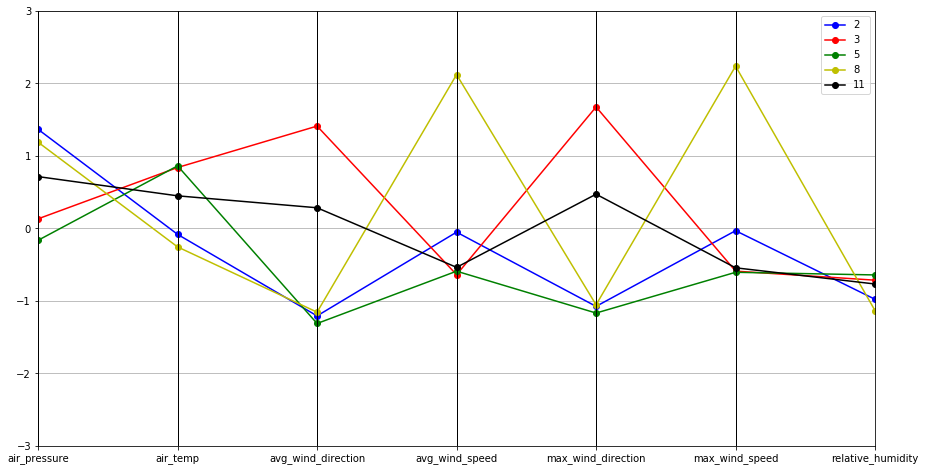

In [37]:
parallel_plot(P[P['relative_humidity'] < -0.5])

/Users/anjul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


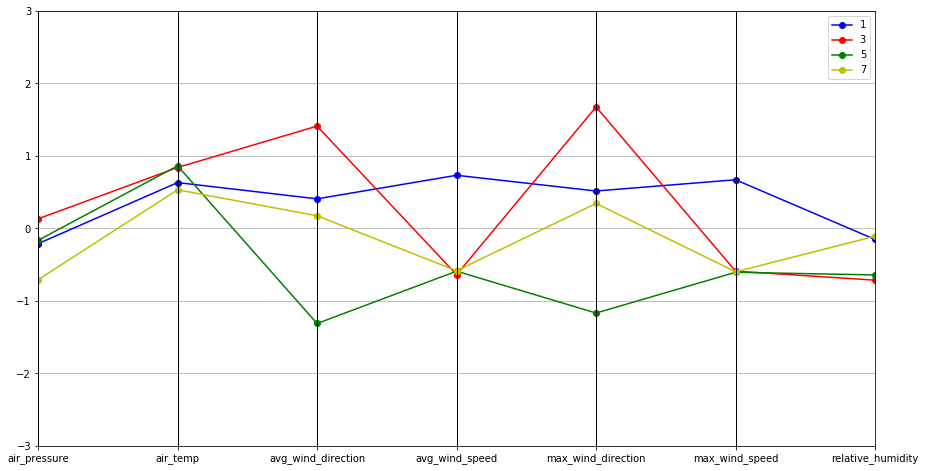

In [38]:
parallel_plot(P[P['air_temp'] > 0.5])

/Users/anjul/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


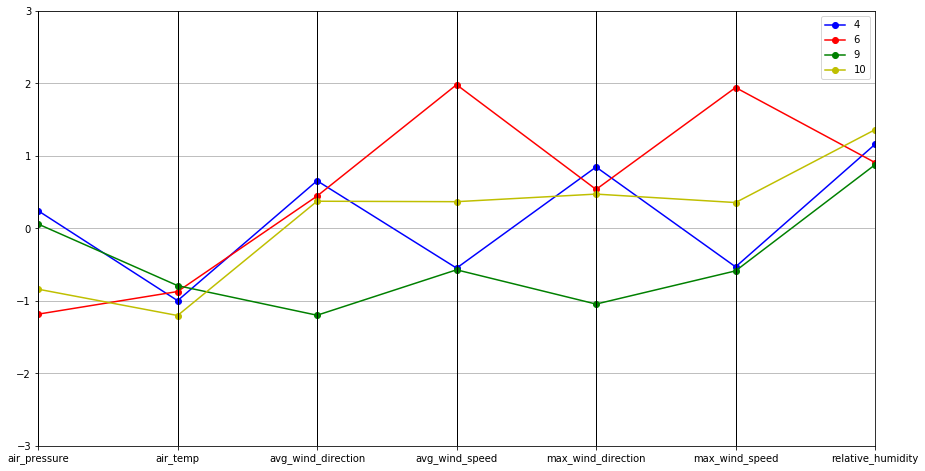

In [41]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])